In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\train"

In [4]:
val_dir = r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\validaton"

In [5]:
test_dir = r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\test"

In [6]:
# Create an ImageDataGenerator for data augmentation (optional but recommended)
train_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,           # Adjust batch size for memory constraints
    class_mode='categorical'  # Use 'categorical' for multiple classes, 'binary' for 2 classes
)

Found 1666 images belonging to 3 classes.


In [10]:
valid_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,           # Adjust batch size for memory constraints
    class_mode='categorical'  # Use 'categorical' for multiple classes, 'binary' for 2 classes
)

Found 210 images belonging to 3 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,           # Adjust batch size for memory constraints
    class_mode='categorical',  # Use 'categorical' for multiple classes, 'binary' for 2 classes
    classes=['Bengin_lung_cancer_image', 'malignant_lung_cancer_image', 'normal_images']  # Specify valid classes explicitly
)

Found 207 images belonging to 3 classes.


In [12]:
len(train_generator)

53

hence we 53 batch each batch consist of 32 image expect last ones

name of the classes we have in train_generator

In [13]:
train_generator.class_indices

{'Bengin_lung_Cancer_image': 0, 'malignant_lung_cancer': 1, 'normal_images': 2}

In [14]:
train_generator.classes

array([0, 0, 0, ..., 2, 2, 2])

In [15]:
train_generator.image_shape

(224, 224, 3)

so we have three classes of image and size of the image 224 224 3

In [16]:
train_generator[0][1]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [17]:
len(train_generator[0][1])

32

In [18]:
image_label = ['bengin_cancer', 'malignant_cancer', 'normal_image']

In [19]:
images,label = next(train_generator)

In [20]:
print(f"length of the images = {len(images)} and length of the label = {len(label)}")

length of the images = 32 and length of the label = 32


In [21]:
images[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       ...,

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0

In [22]:
label[0]

array([0., 1., 0.], dtype=float32)

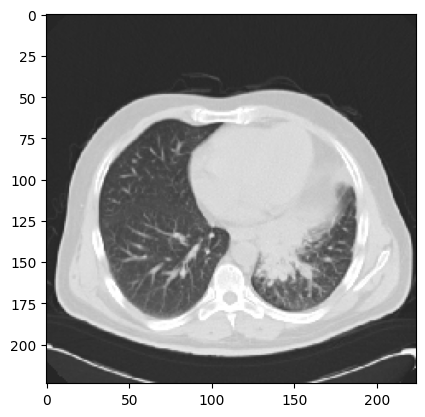

In [23]:
plt.imshow(images[0])

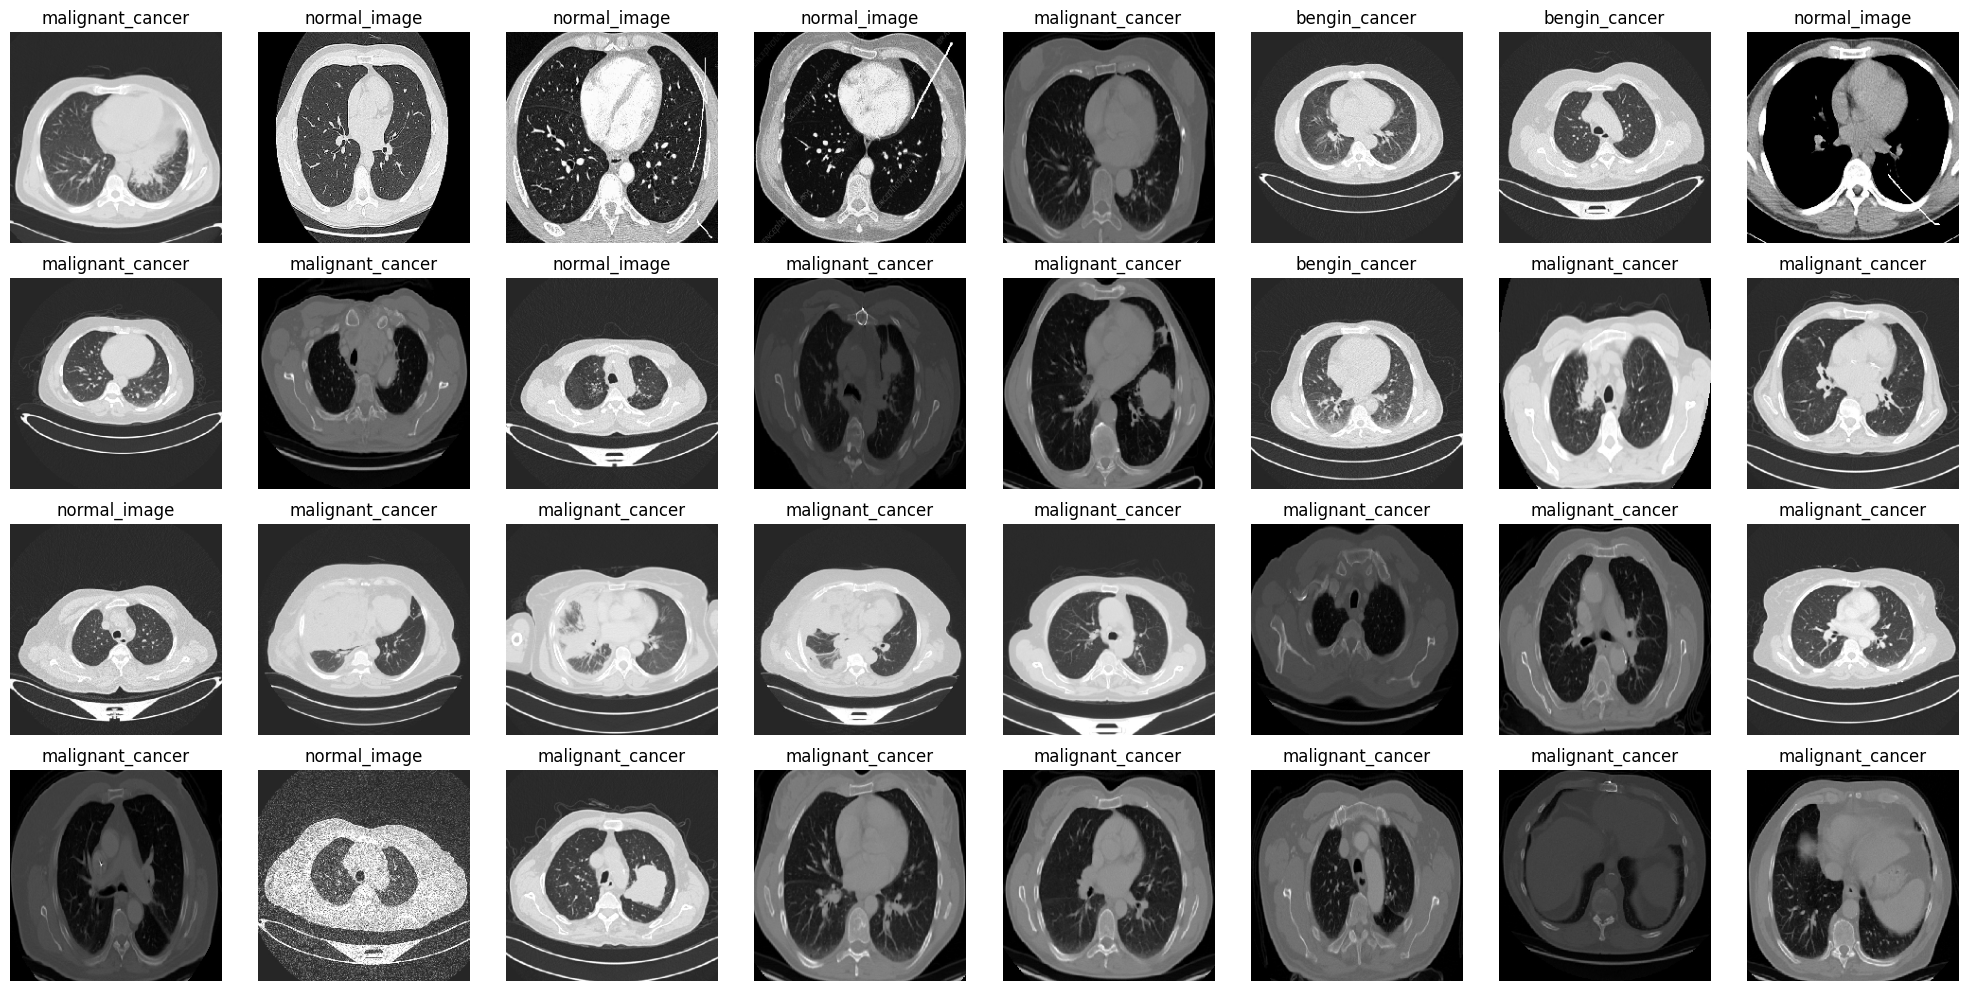

In [24]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
  plt.subplot(4,8,i+1)
  plt.imshow(images[i])
  index = np.argmax(label[i])
  plt.title(image_label[index])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
train_generator.reset()

In [26]:
training_images = []
training_labels = []
for i in range(len(train_generator)):
    batch_data, batch_labels = next(train_generator)
    training_images.append(batch_data)
    training_labels.append(batch_labels)

training_images = np.concatenate(training_images)
training_labels = np.concatenate(training_labels)

In [27]:
testing_images = []
testing_labels = []
for i in range(len(test_generator)):
    batch_data, batch_labels = next(test_generator)
    testing_images.append(batch_data)
    testing_labels.append(batch_labels)
testing_images = np.concatenate(testing_images)
testing_labels = np.concatenate(testing_labels)

In [28]:
validation_images = []
validation_labels  = []
for i in range(len(valid_generator)):
    batch_data, batch_labels = next(valid_generator)
    validation_images.append(batch_data)
    validation_labels.append(batch_labels)
validation_images = np.concatenate(validation_images)
validation_labels = np.concatenate(validation_labels)

In [29]:
print(len(training_images))
print(len(testing_images))

1666
207


In [30]:
print(len(training_labels))
print(len(testing_labels))

1666
207


In [31]:
print(len(validation_images))
print(len(validation_labels))

210
210


In [33]:
training_images[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

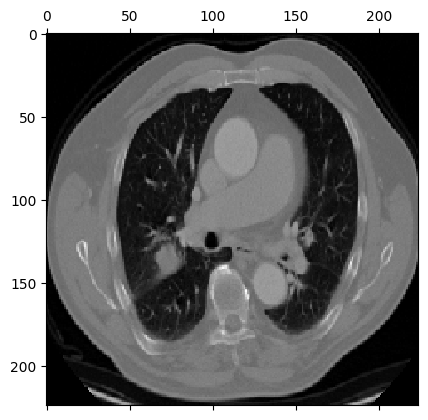

In [34]:
plt.matshow(training_images[0])

In [35]:
training_labels[0]

array([0., 1., 0.], dtype=float32)

In [36]:
training_labels_output = np.argmax(training_labels,axis = 1)
testing_labels_output = np.argmax(testing_labels,axis = 1)
validation_labels_output = np.argmax(validation_labels,axis = 1)

In [37]:
print(len(training_labels_output))
print(len(testing_labels_output))
print(len(validation_labels_output))

1666
207
210


In [38]:
training_labels_output[0]

1

In [39]:
testing_labels_output[0]

1

In [40]:
validation_labels_output[0]

1

In [41]:
image_label[training_labels_output[0]]

'malignant_cancer'

we have all image in training_image and we have label output in training_label_output
total size of training data is 1666
training support vector machine on this dataset

In [42]:
training_images.ndim

4

In [43]:
training_images.shape

(1666, 224, 224, 3)

here 1666 denote the total number of image 224 denote the height of the image 224 denote the width of the image 3 refer to the channel of the image here the channel is RGB RED GREEN BLUE

In [44]:
import keras

In [45]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

VGG 16 is convolutional neural network with 16 layer it is pretrained on large dataset of over a million of images from imagenet and classify image into 1000 category

In [47]:
image_size = [224,224]

In [48]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [49]:
vgg19 = VGG19(input_shape = image_size + [3], weights = 'imagenet',include_top = False)

In [50]:
vgg.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>

In [51]:
vgg19.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_19>

In [52]:
len(vgg.layers)

19

In [53]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [54]:
for layer in vgg19.layers:
  layer.trainable = False

In [55]:
from glob import glob

In [56]:
folder = glob(r"D:\MAJOR PROJECT\CTScanModel\lungCancer\preProcessedLungCancer\train")

In [57]:
len(folder)

1

In [58]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

In [59]:
vgg19X = Flatten()(vgg19.output)
# x = Dense(1000, activation='relu')(x)
predictionvgg19 = Dense(3, activation='softmax')(vgg19X)

In [60]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [61]:
modelvgg19 = Model(inputs=vgg19.input, outputs=predictionvgg19)

In [62]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [63]:
modelvgg19.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,651 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [64]:
type(training_images)

numpy.ndarray

In [65]:
type(training_labels)

numpy.ndarray

In [66]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [67]:
modelvgg19.compile(
    loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [68]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs of no improvement
    restore_best_weights=True  # Roll back to the best weights
)

vgg16model = model.fit(
    training_images,         # Training images
    training_labels,         # Training labels
    epochs=11,                # Number of epochs
    validation_data=(
        validation_images,   # Validation images
        validation_labels    # Validation labels
    )
)

Epoch 1/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 420s 7s/step - accuracy: 0.7597 - loss: 0.7768 - val_accuracy: 0.9048 - val_loss: 0.2212
Epoch 2/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 373s 7s/step - accuracy: 0.9498 - loss: 0.1300 - val_accuracy: 0.9571 - val_loss: 0.1415
Epoch 3/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 379s 7s/step - accuracy: 0.9819 - loss: 0.0638 - val_accuracy: 0.9571 - val_loss: 0.1460
Epoch 4/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 381s 7s/step - accuracy: 0.9866 - loss: 0.0538 - val_accuracy: 0.9667 - val_loss: 0.1133
Epoch 5/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 362s 7s/step - accuracy: 0.9972 - loss: 0.0225 - val_accuracy: 0.9619 - val_loss: 0.1153
Epoch 6/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 367s 7s/step - accuracy: 0.9938 - loss: 0.0276 - val_accuracy: 0.9762 - val_loss: 0.0983
Epoch 7/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 366s 7s/step - accuracy: 0.9893 - loss: 0.0306 - val_accuracy: 0.9762 - val_loss: 0.0918
Epoch 8/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.9993 - loss: 0.0098 - val_accuracy: 0.9810 - v

In [69]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs of no improvement
    restore_best_weights=True  # Roll back to the best weights
)
vgg19model = modelvgg19.fit(
    training_images,         # Training images
    training_labels,         # Training labels
    epochs=11,                # Number of epochs
    validation_data=(
        validation_images,   # Validation images
        validation_labels    # Validation labels
    )
)

Epoch 1/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.7225 - loss: 1.0640 - val_accuracy: 0.8714 - val_loss: 0.3237
Epoch 2/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.9288 - loss: 0.1988 - val_accuracy: 0.9286 - val_loss: 0.1706
Epoch 3/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.9716 - loss: 0.0991 - val_accuracy: 0.9524 - val_loss: 0.1522
Epoch 4/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.9839 - loss: 0.0602 - val_accuracy: 0.9619 - val_loss: 0.1603
Epoch 5/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - accuracy: 0.9923 - loss: 0.0417 - val_accuracy: 0.9667 - val_loss: 0.1392
Epoch 6/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 231s 4s/step - accuracy: 0.9986 - loss: 0.0322 - val_accuracy: 0.9571 - val_loss: 0.1521
Epoch 7/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 242s 5s/step - accuracy: 0.9980 - loss: 0.0251 - val_accuracy: 0.9619 - val_loss: 0.1433
Epoch 8/11
53/53 ━━━━━━━━━━━━━━━━━━━━ 237s 4s/step - accuracy: 0.9973 - loss: 0.0228 - val_accuracy: 0.9762 - v

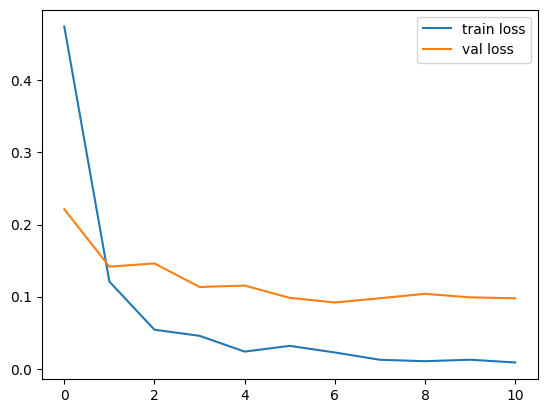

<Figure size 640x480 with 0 Axes>

In [70]:
# loss
plt.plot(vgg16model.history['loss'], label='train loss')
plt.plot(vgg16model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

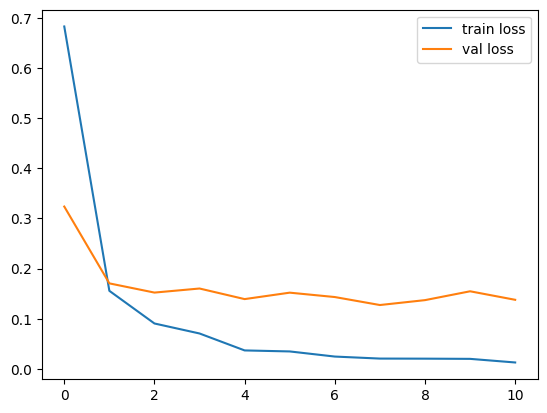

<Figure size 640x480 with 0 Axes>

In [71]:
# loss
plt.plot(vgg19model.history['loss'], label='train loss')
plt.plot(vgg19model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

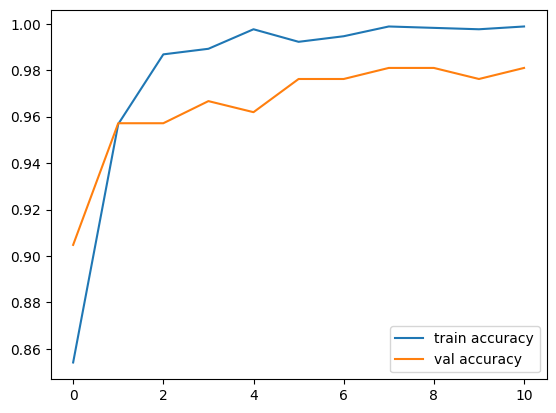

<Figure size 640x480 with 0 Axes>

In [72]:
# loss
plt.plot(vgg16model.history['accuracy'], label='train accuracy')
plt.plot(vgg16model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

lets check on some test data how our model perform

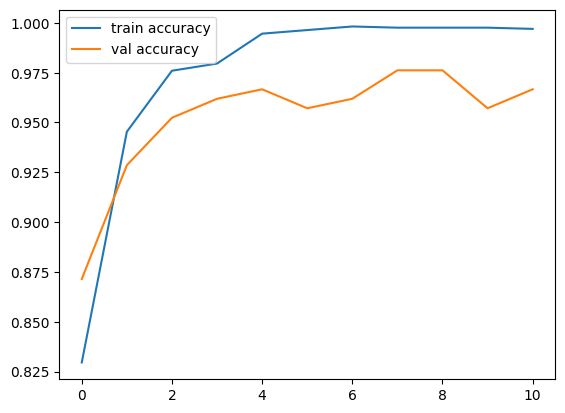

<Figure size 640x480 with 0 Axes>

In [73]:
# loss
plt.plot(vgg19model.history['accuracy'], label='train accuracy')
plt.plot(vgg19model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [74]:
testing_images[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961]],

       ...,

       [[0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0.14901961, 0.14901961],
        [0.14901961, 0

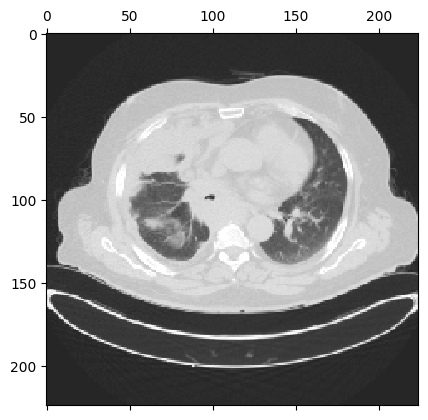

In [75]:
plt.matshow(testing_images[0])

In [76]:
image_label[testing_labels_output[0]]

'malignant_cancer'

In [77]:
testing_images.ndim

4

In [78]:
testing_images[0].ndim

3

In [79]:
output = model.predict(testing_images)

7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step


In [80]:
# output from vgg 19 training model
outputvgg19 = modelvgg19.predict(testing_images)

7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step


In [81]:
output

array([[2.65214368e-07, 9.99979496e-01, 2.02307656e-05],
       [4.84944508e-07, 9.99937892e-01, 6.15824683e-05],
       [5.28828714e-08, 3.11963493e-03, 9.96880412e-01],
       [2.36850756e-04, 3.78029747e-03, 9.95982885e-01],
       [8.44610724e-07, 9.97748315e-01, 2.25080200e-03],
       [1.40051311e-03, 9.95622694e-01, 2.97678704e-03],
       [8.67177069e-01, 5.21358475e-03, 1.27609402e-01],
       [1.30441180e-07, 9.98958230e-01, 1.04166765e-03],
       [9.31145728e-01, 1.07875653e-03, 6.77755326e-02],
       [3.96896581e-07, 9.99877572e-01, 1.22015394e-04],
       [1.88673809e-07, 9.99988198e-01, 1.15710345e-05],
       [1.82917793e-04, 9.98643935e-01, 1.17315981e-03],
       [1.77123852e-07, 5.95220888e-04, 9.99404669e-01],
       [5.08960329e-06, 9.99904513e-01, 9.03764158e-05],
       [1.64448225e-04, 9.99478042e-01, 3.57506884e-04],
       [5.95972278e-06, 9.99983311e-01, 1.07712531e-05],
       [3.30078865e-06, 9.99906778e-01, 8.98829821e-05],
       [4.76511232e-05, 4.43912

In [82]:
outputvgg19

array([[6.14592045e-06, 9.99941349e-01, 5.25420546e-05],
       [1.51147142e-05, 9.98821199e-01, 1.16366125e-03],
       [1.42199690e-06, 1.33536085e-02, 9.86645043e-01],
       [2.80354987e-03, 3.82113433e-03, 9.93375242e-01],
       [2.24910579e-07, 9.99709070e-01, 2.90651107e-04],
       [9.13587864e-03, 9.78976548e-01, 1.18876528e-02],
       [9.66857672e-01, 3.48408474e-03, 2.96583176e-02],
       [5.40985775e-06, 9.90980089e-01, 9.01451148e-03],
       [9.71696913e-01, 5.29740006e-04, 2.77733598e-02],
       [7.40136201e-08, 9.99978185e-01, 2.17103734e-05],
       [1.04624305e-05, 9.99908686e-01, 8.08031982e-05],
       [5.66479610e-03, 9.92797554e-01, 1.53770845e-03],
       [1.17026195e-06, 2.81081558e-03, 9.97188032e-01],
       [9.53207636e-05, 9.99883413e-01, 2.12375235e-05],
       [1.66934551e-05, 9.99874353e-01, 1.08987755e-04],
       [1.50791548e-05, 9.99980330e-01, 4.57251099e-06],
       [2.84891372e-04, 9.99671936e-01, 4.31512344e-05],
       [1.01315940e-03, 5.03987

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
print("acuracy score of vgg16 " ,accuracy_score(testing_labels_output,np.argmax(output,axis = 1)))

acuracy score of vgg16  0.9951690821256038


In [85]:
print("acuracy score of vgg19 " ,accuracy_score(testing_labels_output,np.argmax(outputvgg19,axis = 1)))

acuracy score of vgg19  0.9855072463768116



the accuracy we get is 99 percent on testing data

In [86]:
img_array_expanded = np.expand_dims(testing_images[0], axis=0)
ans = model.predict(img_array_expanded)
image_label[np.argmax(ans)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'malignant_cancer'

In [87]:
image_label[testing_labels_output[0]]

'malignant_cancer'

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

In [88]:
print(train_generator.class_indices)  # Check the mapping of classes
print(test_generator.class_indices)


{'Bengin_lung_Cancer_image': 0, 'malignant_lung_cancer': 1, 'normal_images': 2}
{'Bengin_lung_cancer_image': 0, 'malignant_lung_cancer_image': 1, 'normal_images': 2}


In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [90]:
output = np.argmax(output,axis = 1)

In [91]:
outputvgg19 = np.argmax(outputvgg19,axis = 1)

In [92]:
print(testing_labels_output[:5])
print()
print(output[:5])

[1 1 2 2 1]

[1 1 2 2 1]


In [93]:
cm = confusion_matrix(testing_labels_output,output)

In [94]:
cmvgg19 = confusion_matrix(testing_labels_output,outputvgg19)

In [95]:
cm

array([[ 12,   0,   0],
       [  0, 134,   0],
       [  1,   0,  60]], dtype=int64)

In [96]:
cmvgg19

array([[ 12,   0,   0],
       [  0, 133,   1],
       [  2,   0,  59]], dtype=int64)

In [97]:
cm_df = pd.DataFrame(cm,
                     index = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'],
                     columns = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'])

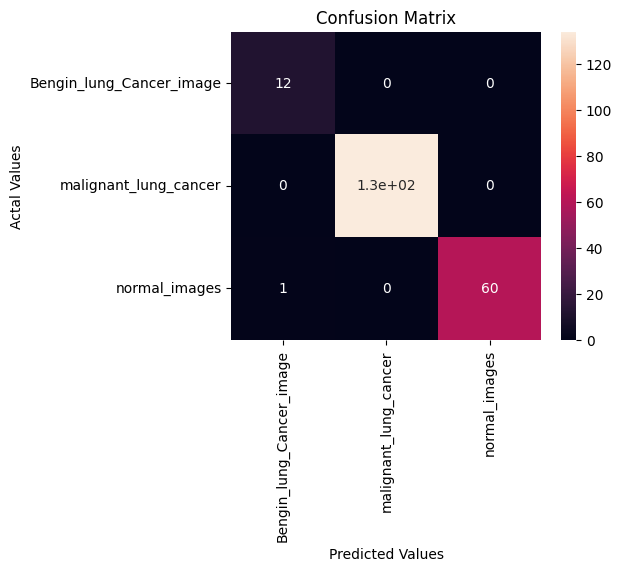

In [98]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

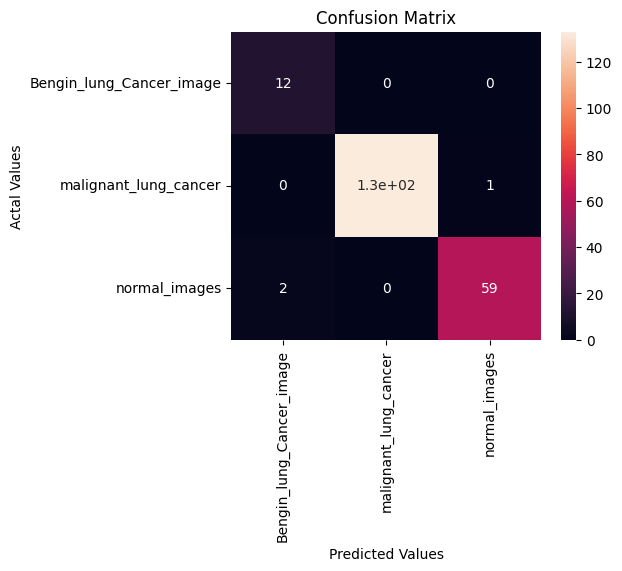

In [99]:
cm_df = pd.DataFrame(cmvgg19,
                     index = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'],
                     columns = ['Bengin_lung_Cancer_image', 'malignant_lung_cancer', 'normal_images'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [100]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [101]:
f1_scorevgg16 = f1_score(testing_labels_output, output, average="macro")
precision_scorevgg16 = precision_score(testing_labels_output, output, average="macro")
recall_scorevgg16 = recall_score(testing_labels_output, output, average="macro")

In [102]:
f1_scorevgg19 = f1_score(testing_labels_output, outputvgg19, average="macro")
precision_scorevgg19 = precision_score(testing_labels_output, outputvgg19, average="macro")
recall_scorevgg19 = recall_score(testing_labels_output, outputvgg19, average="macro")

In [103]:
from sklearn.metrics import cohen_kappa_score

In [104]:
kappavgg16 = cohen_kappa_score(testing_labels_output,output)

In [105]:
kappavgg19 = cohen_kappa_score(testing_labels_output,outputvgg19)

In [106]:
print("VGG 16 RESULT")
print(f"f1 score is { f1_scorevgg16*100 }")
print(f"precision score is { precision_scorevgg16*100 }")
print(f"recall score is { recall_scorevgg16*100 }")
print(f"kappa score is { kappavgg16*100}")

VGG 16 RESULT
f1 score is 98.39118457300276
precision score is 97.43589743589745
recall score is 99.45355191256832
kappa score is 99.0178867960336


In [107]:
print("VGG 19 RESULT")
print(f"f1 score is { f1_scorevgg19*100 }")
print(f"precision score is { precision_scorevgg19*100 }")
print(f"recall score is { recall_scorevgg19*100}")
print(f"kappa score is {kappavgg19*100}")

VGG 19 RESULT
f1 score is 96.48460720983704
precision score is 94.68253968253968
recall score is 98.65834760623113
kappa score is 97.07061653851596


In [108]:
# Save the VGG16 model
model.save("vgg16_lung_cancer_model.h5")  # Saves as an HDF5 file

# Save the VGG19 model
modelvgg19.save("vgg19_lung_cancer_model.h5")  # Saves as an HDF5 file

print("Models saved successfully!")


Models saved successfully!


In [109]:
# Save the VGG16 model in the recommended format
model.save("vgg16_lung_cancer_model.keras")  # Saves in the Keras format

# Save the VGG19 model in the recommended format
modelvgg19.save("vgg19_lung_cancer_model.keras")  # Saves in the Keras format

print("Models saved in the recommended format!")


Models saved in the recommended format!


In [110]:
from tensorflow.keras.models import load_model

# Load the saved VGG16 model
loaded_vgg16_model = load_model("vgg16_lung_cancer_model.h5")

# Load the saved VGG19 model
loaded_vgg19_model = load_model("vgg19_lung_cancer_model.h5")

# Print a summary to ensure the models are intact
loaded_vgg16_model.summary()
loaded_vgg19_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789,957 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,653 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 2 (12.00 B)

In [111]:
from tensorflow.keras.models import load_model

# Load the saved VGG16 model
loaded_vgg16_model = load_model("vgg16_lung_cancer_model.keras")

# Load the saved VGG19 model
loaded_vgg19_model = load_model("vgg19_lung_cancer_model.keras")

# Print a summary to ensure the models are intact
loaded_vgg16_model.summary()
loaded_vgg19_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,865,224 (56.71 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 75,269 (294.02 KB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,174,920 (76.96 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 75,269 (294.02 KB)